# 简单线性回归（梯度下降法）

### 0. 引入依赖

In [25]:
import numpy as np
import matplotlib.pyplot as plt

### 1. 导入数据 (data.csv)

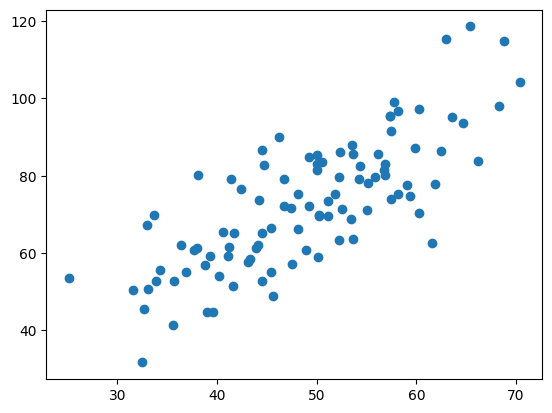

In [26]:
points = np.genfromtxt("data.csv",delimiter=",")

#points

#提取points中的两列数据分别作为x和y
x=points[:,0]
y=points[:,1]


plt.scatter(x,y)
plt.show()

### 2.定义损失函数

In [27]:
#损失函数是系数的函数，另外还要传入数据x，y
def compute_cost(w,b,points):
    total_cost = 0
    M = len(points)

    #逐点计算平方误差，然后求平均数

    for i in range (M):
        x = points[i,0]
        y = points[i,1]
        total_cost+=(y-(w*x+b))**2
    
    return total_cost/M

### 3.定义模型的超参数

In [28]:
alpha = 0.0001
initial_w = 0
initial_b = 0
num_iter = 10


### 4. 定义核心梯度下降算法函数

In [29]:
def grad_desc(points, initial_w, initial_b,alpha, num_iter):
    w = initial_w
    b = initial_b
    # 定义一个列表，保存所有损失函数值
    # 用来显示下降过程
    cost_list=[]

    for i in range(num_iter):
        cost_list.append(compute_cost(w,b,points))
        w,b=step_grad_desc(w,b,alpha,points)
    return [w,b,cost_list]

def step_grad_desc(curr_w, curr_b,alpha,points):
    sum_grad_w=0
    sum_grad_b=0
    M = len(points)

    ##grad_w=(2/M)*sum((curr_w*points[:,0]+curr_b-points[:,1])*points[:,0])
    ##grad_b=(2/M)*sum((curr_w*points[:,0]+curr_b-points[:,1]))

    #对每个点，带入公式求和
    for i in range(M):
        x = points[i,0]
        y = points[i,1]
        sum_grad_w +=(curr_w*x+curr_b-y)*x
        sum_grad_b +=(curr_w*x+curr_b-y)
    
    #用公式求当前的梯度
    grad_w=2/M * sum_grad_w
    grad_b=2/M * sum_grad_b

    # 梯度下降，更新当前的w和b
    update_w = curr_w-alpha*grad_w
    update_b = curr_b-alpha*grad_b

    return update_w, update_b




### 5.测试：运行梯度下降算法，计算最优的w和b

w is  1.4774173755483797
b is  0.02963934787473238
cost is  112.65585181499746


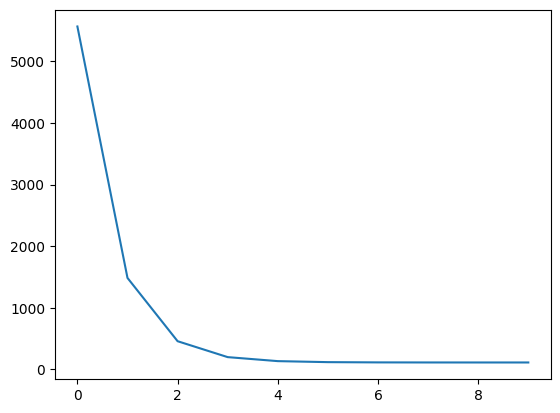

In [30]:
w,b,cost_list = grad_desc(points, initial_w, initial_b, alpha, num_iter)

print("w is ", w)
print("b is ", b)

cost=compute_cost(w,b,points)

print("cost is ", cost)

plt.plot(cost_list) ##用index做横坐标

plt.show()

### 6. 画出拟合曲线

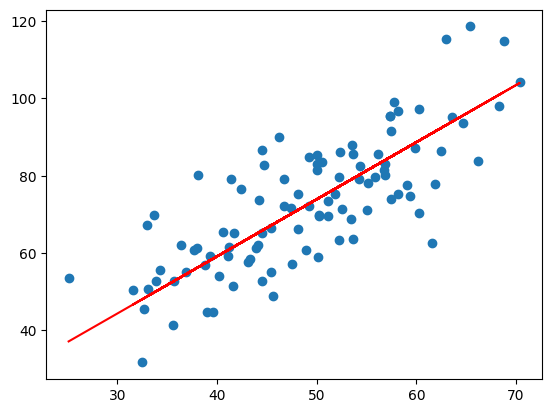

In [31]:
plt.scatter(x,y)

#针对每一个x，计算出预测的y值
pred_y=w*x+b

plt.plot(x,pred_y,c='r')
plt.show()